<a href="https://colab.research.google.com/github/Paulsob/TelecomLabs/blob/main/FirstLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import thinkdsp

In [2]:
sound = thinkdsp.Audio(filename="/content/sounds/guitar.wav")
sound

Конвертируем файл в стандартный PCM WAV

In [3]:
!ffmpeg -i "/content/sounds/guitar.wav" -c:a pcm_s16le "/content/sounds/guitar_fixed.wav"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

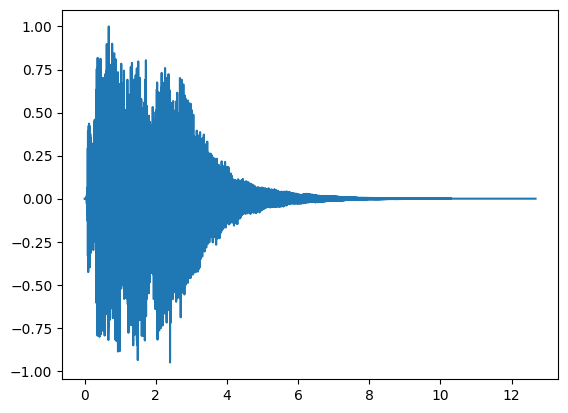

In [4]:
wave = thinkdsp.read_wave("/content/sounds/guitar_fixed.wav")
wave.normalize()
wave.plot()

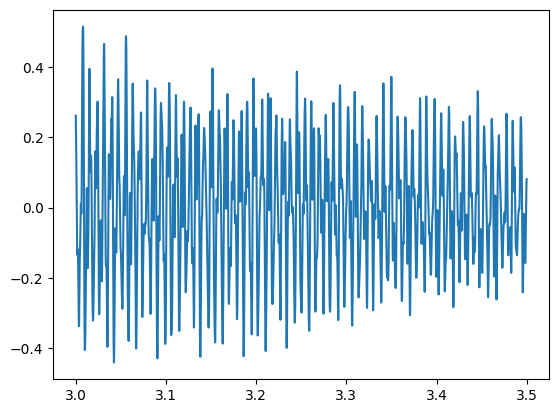

In [5]:
segment = wave.segment(start=3, duration=0.5)
segment.make_audio()
segment.plot()

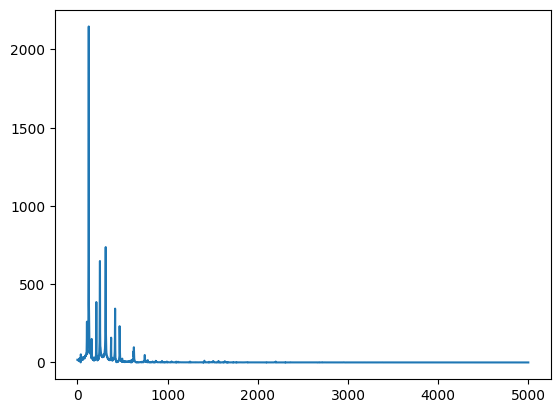

In [6]:
spec = segment.make_spectrum()
spec.plot(high=5000)

Тембр звука напрямую определяется его гармонической структурой в спектре. Чем сложнее распределение гармоник в спектре, тем «окрашеннее» звук. Спектр — это «отпечаток пальца» тембра.



In [7]:
spec_new: thinkdsp.Spectrum = spec.copy()
spec_new.low_pass(250)
spec_new.make_wave().make_audio()

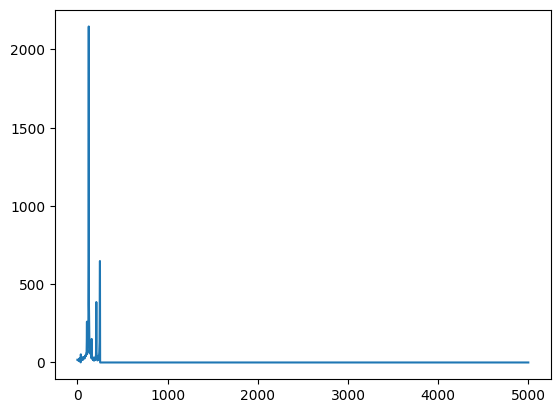

In [8]:
spec_new.plot(high=5000)

In [9]:
sinus_signal = thinkdsp.SinSignal(freq=280, amp=1.0, offset=0)
cosinus_signal = thinkdsp.CosSignal(freq=340, amp=1.0, offset=0)
mixed: thinkdsp.Signal = sinus_signal + cosinus_signal
mixed_wave: thinkdsp.Wave = mixed.make_wave(duration=0.5, start=0, framerate=6025)
mixed_wave.make_audio()

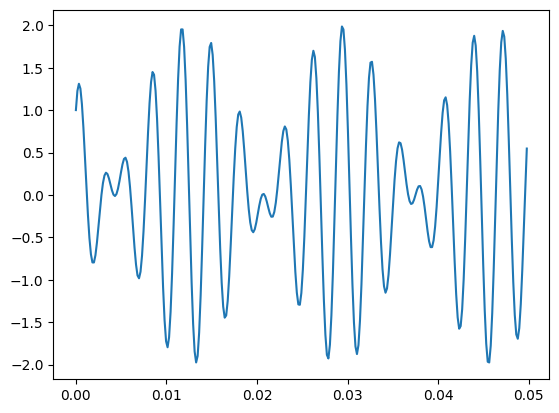

In [10]:
mixed_wave.segment(start=0, duration=0.05).plot()

In [11]:
nyquist = mixed_wave.framerate // 2
print(nyquist)  # Максимальная частота для спектра

3012


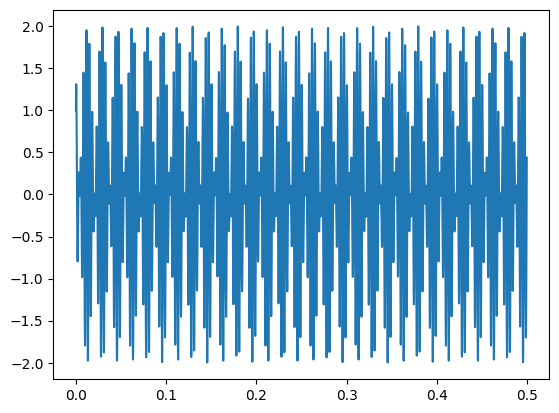

In [14]:
my_spectrum = mixed_wave.make_spectrum()  # Без перезаписи класса!
mixed_wave.plot()

In [15]:
new_mixed = mixed + thinkdsp.SinSignal(freq=440, amp=1, offset=0)

In [16]:
mix2_wave: thinkdsp.Wave = new_mixed.make_wave(duration=0.5, start=0, framerate=6025)
mix2_wave.make_audio()

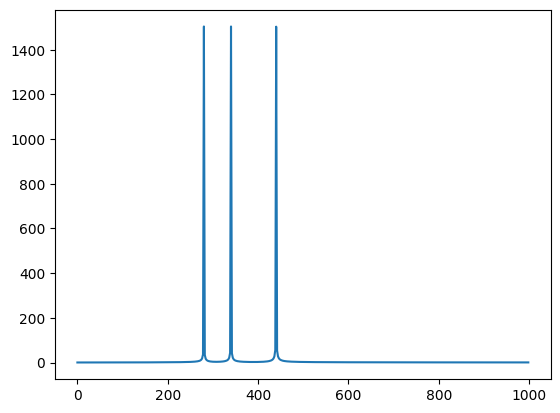

In [17]:
mix2_spectrum: thinkdsp.Spectrum = mix2_wave.make_spectrum()
mix2_spectrum.plot(high=1000)

In [21]:
def stretch(wave, factor):
    wave.ts = wave.ts / factor
    wave.framerate = wave.framerate * factor